In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
a=pd.read_csv('Netflix Userbase.csv')

In [5]:
a.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
#datatype validation
a['Join Date']=pd.to_datetime(a['Join Date'])

In [8]:
#checking for nulls
a.isnull().sum()/len(a)*100

User ID              0.0
Subscription Type    0.0
Monthly Revenue      0.0
Join Date            0.0
Last Payment Date    0.0
Country              0.0
Age                  0.0
Gender               0.0
Device               0.0
Plan Duration        0.0
dtype: float64

# Analysis

In [9]:
#what subscription type preffered the most
a['Subscription Type'].value_counts(normalize=True)*100

Basic       39.96
Standard    30.72
Premium     29.32
Name: Subscription Type, dtype: float64

([<matplotlib.patches.Wedge at 0x264f0e70760>,
 [Text(0.34123307389303664, 1.0457341867231413, 'Basic'),
  Text(-1.0391166897267612, -0.36088295212062604, 'Standard'),
  Text(0.6654260205519349, -0.8759042248855843, 'Premium')],
 [Text(0.18612713121438362, 0.5704004654853497, '40%'),
  Text(-0.5667909216691424, -0.19684524661125055, '31%'),
  Text(0.36295964757378263, -0.4777659408466822, '29%')])

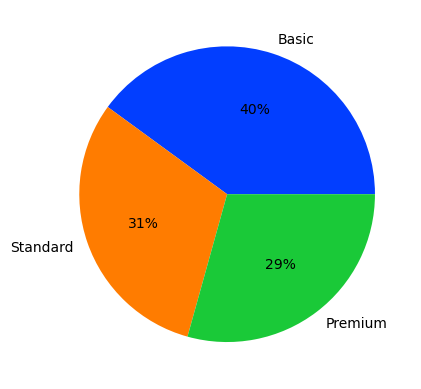

In [10]:
stype=a['Subscription Type'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(stype.values, labels=stype.index, colors=palette_color, autopct='%.0f%%')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico')])

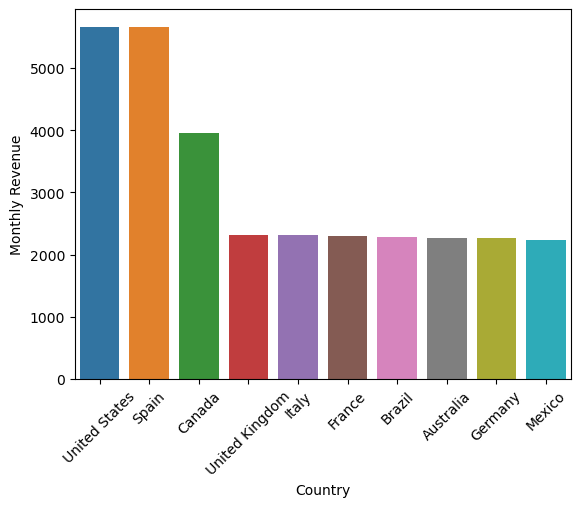

In [11]:
#countries and atheir revenue
cr=a.groupby('Country')['Monthly Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Country', y='Monthly Revenue', data=cr)                            
plt.xticks(rotation=45)

In [12]:
#year with mox revenue till date
yr=a.groupby(a['Join Date'].dt.year)['Monthly Revenue'].sum().sort_values(ascending=False).reset_index()
yr                          


,Join Date,Monthly Revenue
0,2022,30635
1,2023,460
2,2021,176


In [13]:
a.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,1 Month


([<matplotlib.patches.Wedge at 0x264f100aa40>,
 [Text(-0.009675938404905706, 1.0999574429113086, 'Female'),
  Text(0.009675938404905327, -1.0999574429113086, 'Male')],
 [Text(-0.005277784584494021, 0.5999767870425319, '50.3%'),
  Text(0.005277784584493813, -0.5999767870425319, '49.7%')])

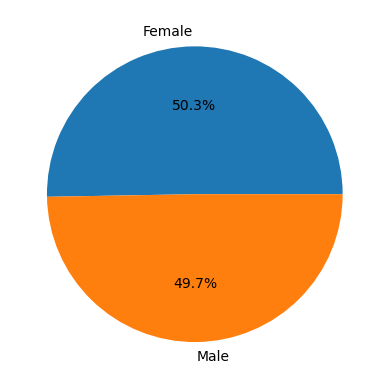

In [14]:
#which gender type bought the subsription most
g=a.Gender.value_counts()
plt.pie(g.values, labels=g.index, autopct='%.01f%%')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15028\3030798772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['Age'], color='red', kde=True, bins=25)


<Axes: xlabel='Age', ylabel='Density'>

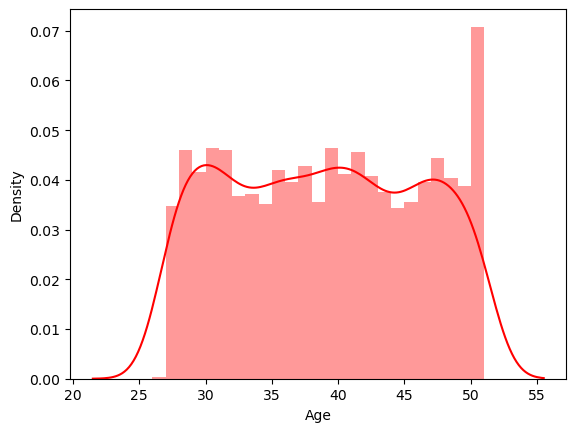

In [15]:
#which age type show the maximum rate
sns.distplot(a['Age'], color='red', kde=True, bins=25)

In [16]:
#which age category plays significant role in generating revenue
def condition(x):
    if x in range(25,35):
        return "young adult"
    elif x>34 and x<45:
        return "Mid Age adult"
    else:
        return 'old adult'
a['Age_Category']=a.Age.apply(condition)

([<matplotlib.patches.Wedge at 0x264f1123f10>,
 [Text(0.3189793240178032, 1.0527355749898193, 'Mid Age adult'),
  Text(-1.0643804412931406, -0.277658560452617, 'old adult'),
  Text(0.574378543591262, -0.9381307417742907, 'young adult')],
 [Text(0.17398872219152903, 0.5742194045399014, '40.6%'),
  Text(-0.5805711497962583, -0.15145012388324564, '26.9%'),
  Text(0.31329738741341556, -0.5117076773314312, '32.5%')])

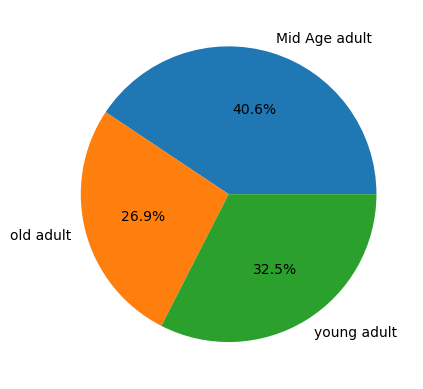

In [17]:
acat=a.groupby('Age_Category')['Monthly Revenue'].sum()
plt.pie(acat.values, labels= acat.index, autopct='%.01f%%')

In [18]:
a.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Age_Category
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month,young adult
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,1 Month,Mid Age adult
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Mid Age adult
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,1 Month,old adult
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,1 Month,young adult


,index,Device
0,Laptop,25.44
1,Tablet,25.32
2,Smartphone,24.84
3,Smart TV,24.40


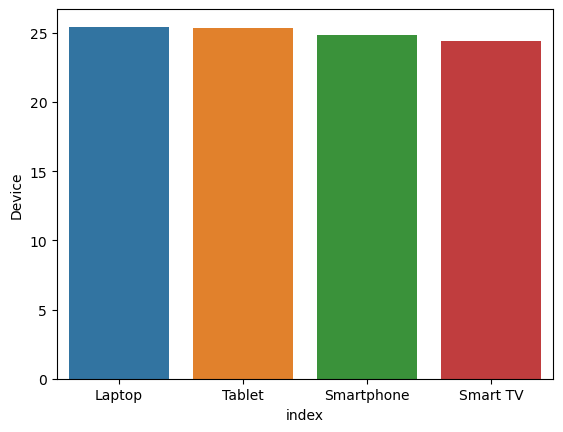

In [19]:
#what device type our users mostly use
dt=(a['Device'].value_counts(normalize=True)*100).reset_index()
sns.barplot(x='index', y='Device', data=dt)
dt

In [20]:
a.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Age_Category
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month,young adult
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,1 Month,Mid Age adult
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,Mid Age adult
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,1 Month,old adult
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,1 Month,young adult


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'October'),
  Text(1, 0, 'July'),
  Text(2, 0, 'June'),
  Text(3, 0, 'September'),
  Text(4, 0, 'August'),
  Text(5, 0, 'May'),
  Text(6, 0, 'November'),
  Text(7, 0, 'April'),
  Text(8, 0, 'March'),
  Text(9, 0, 'December'),
  Text(10, 0, 'February'),
  Text(11, 0, 'January')])

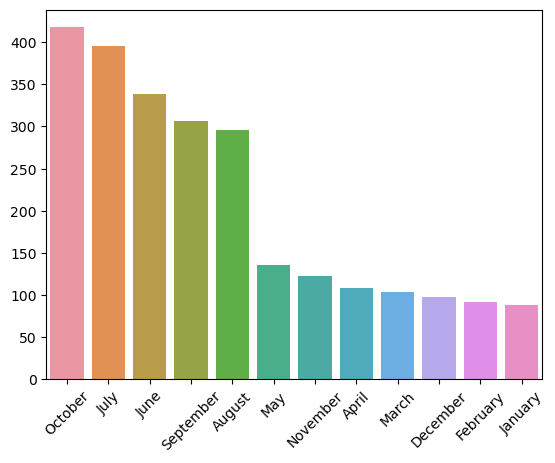

In [21]:
#at which month netflix gains most of the subscribers
m=(a['Join Date'].dt.month_name()).value_counts()
sns.barplot(x=m.index, y=m.values)
plt.xticks(rotation=45)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15028\3306312665.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


<Axes: xlabel='Join Date', ylabel='Density'>

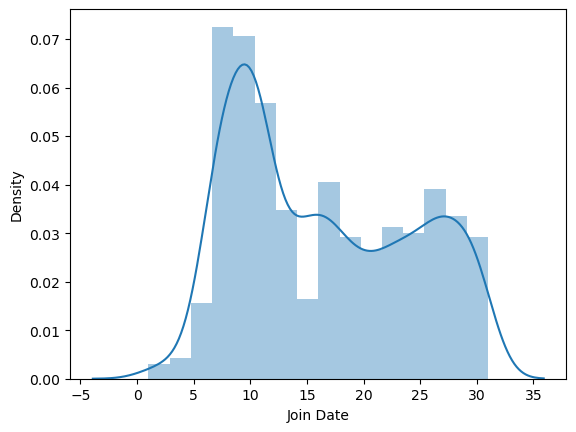

In [24]:
#line chart representing at which day in a month the user took the subsription
d=a['Join Date'].dt.day
sns.distplot(d)

In [26]:
#analysis on last payment date
a.head()
a['Last Payment Date']=pd.to_datetime(a['Last Payment Date'])